[0.672, 13.174]
0
[8.061, 12.404]
1


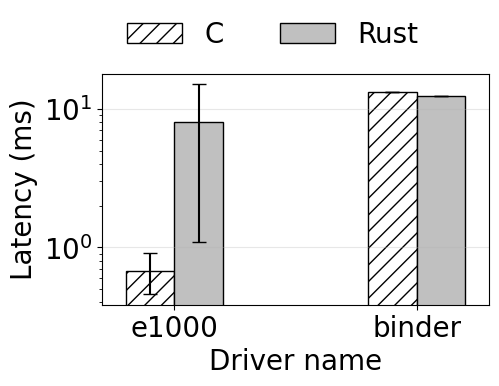

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

driver = ['e1000', 'binder']
x = np.arange(len(driver))
# avg 数据 第一个是e1000 第二个是binder
data = {
    'C' : [0.672, 13.174],
    'Rust' : [8.061, 12.404],
}
# 柱宽
width = 0.2
multiplier = 0
# 定义 errorbar 的长度 (max-min)/2
errors = {
    'C' : [(0.915 - 0.458)/2, (-13.157+13.190)/2],
    'Rust' : [(-1.091+15.082)/2, (-12.396+12.422)/2]
}
# errorbar 的纵坐标位置 (max+min)/2
errors_loc = {
    'C' : [(0.458+0.915)/2, (13.157+13.190)/2],
    'Rust' : [(1.091+15.082)/2, (12.396+12.422)/2]
}
# 定义柱子的颜色
color = {
    'C': 'white',
    'Rust' : 'silver'
}
hatch = {
    'C': '//',
    'Rust' : ''
}

fig, ax = plt.subplots(figsize=(5,3), dpi=100)
for name, per in data.items():
    print(per)
    print(multiplier)
    offset = width * multiplier
    rects = ax.bar(x + offset, per, width, label=name, color=color[name], hatch=hatch[name], linewidth=1, edgecolor='black')
    ax.tick_params(labelcolor='black', axis='x')
    errorbar1 = ax.errorbar(x[0] + offset, errors_loc[name][0], yerr=errors[name][0], ecolor='black', capsize=5)
    errorbar2 = ax.errorbar(x[1] + offset, errors_loc[name][1], yerr=errors[name][1], ecolor='black', capsize=5)
    multiplier += 1

ax.legend(ncol=2, loc="lower left", bbox_to_anchor=(0, 1), frameon=False, fontsize=20)
ax.set_ylabel('Latency (ms)', size=20)
ax.set_xlabel('Driver name', size=20)
ax.set_xticks(x + width / 2, labels=driver)
ax.set_xlim(x.min()-width, x.max()+width*2)
ax.grid(axis='y', alpha=0.3)
ax.tick_params(labelsize=20)

plt.yscale('log')
plt.savefig("../imgs/figure8.pdf", bbox_inches="tight")
